In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('weekend.csv')

In [35]:
df.head()
df.rename(columns={'Latitude':'Longitude','Longitude':'Latitude'},inplace=True)

In [36]:
df.head()

,Latitude,Longitude,date,time
0,1.300540,103.80059,2017-03-17,18:58:56
1,1.396308,103.90990,2017-03-17,18:52:25
2,1.303450,103.76456,2017-03-17,18:57:08
3,1.358805,103.95470,2017-03-17,18:58:56
4,1.358830,103.98949,2017-03-17,18:54:20


In [37]:
min(df.Latitude),max(df.Latitude),min(df.Longitude),max(df.Longitude)

(1.2405200000000001, 1.46323, 103.61408, 104.0055)

In [38]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [39]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]

In [40]:
df = df.drop(['Latitude', 'Longitude'], axis=1)

In [41]:
crs = {'init': 'epsg:4326'}

In [42]:
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

In [43]:
geo_df.crs

{'init': 'epsg:4326'}

In [44]:
geo_utm_df = geo_df.to_crs(epsg=32648)

In [45]:
geo_utm_df.head()

,date,time,geometry
0,2017-03-17,18:58:56,POINT (366560.0456709936 143780.6979750275)
1,2017-03-17,18:52:25,POINT (378727.5834408033 154362.408950471)
2,2017-03-17,18:57:08,POINT (362551.0820767618 144104.3510358195)
3,2017-03-17,18:58:56,POINT (383710.2831906587 150214.2190888287)
4,2017-03-17,18:54:20,POINT (387581.0854433901 150215.3358675853)


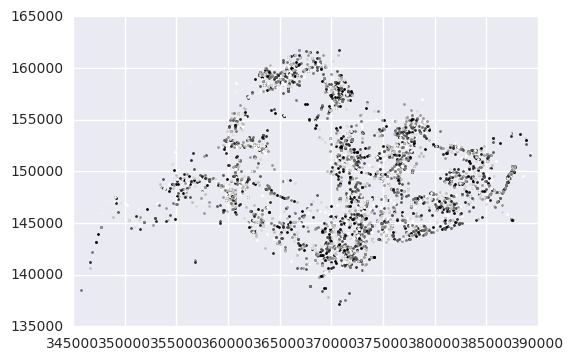

In [46]:
%matplotlib inline
geo_utm_df.plot()

In [47]:
import seaborn as sns

In [48]:
x1 = geo_utm_df.geometry.apply(lambda p:p.x)

In [49]:
x2 = geo_utm_df.geometry.apply(lambda p:p.y)

In [50]:
geo_utm_df['X']= x1
geo_utm_df['Y']= x2

In [ ]:
sns.jointplot(x= geo_utm_df.X, y=geo_utm_df.Y, kind='kde')